In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import *
%matplotlib inline
import re
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')

In [7]:
agg_data = pd.read_csv('prestudy1/agg.csv')
agg_data = agg_data[agg_data['_golden'] == False]
agg_data['iteration'] = 1
agg_data['domain'] = '-'
agg_data.rename(columns={'please_select_how_object_a_and_object_b_compare_in_the_sentence_above:confidence' : 'label:confidence'},inplace=True)
print(agg_data.columns)

full_data = pd.read_csv('prestudy1/full.csv')
#full_data['_golden']

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at',
       'please_select_how_object_a_and_object_b_compare_in_the_sentence_above',
       'label:confidence', 'label',
       'please_select_how_object_a_and_object_b_compare_in_the_sentence_above_gold',
       'sentence', 'iteration', 'domain'],
      dtype='object')


### Confidence

#### With Test Questions

In [28]:
full_data

,_unit_id,_created_at,_golden,_id,_missed,_started_at,_tainted,_channel,_trust,_worker_id,_country,_region,_city,_ip,please_select_how_object_a_and_object_b_compare_in_the_sentence_above,label,please_select_how_object_a_and_object_b_compare_in_the_sentence_above_gold,sentence
0,1444891677,11/9/2017 15:44:46,False,3014445943,NaN,11/9/2017 15:43:38,False,neodev,0.7778,43447518,COL,34,Bogotá,181.56.80.207,UNCLEAR,NO_COMP,NaN,"OBJECT_A, and OBJECT_B, too) undoubtedly influenced people's votes when it"
1,1444891677,11/9/2017 15:45:06,False,3014447723,NaN,11/9/2017 15:43:38,False,neodev,1.0000,43889953,VEN,25,Caracas,201.209.232.151,NO_COMP,NO_COMP,NaN,"OBJECT_A, and OBJECT_B, too) undoubtedly influenced people's votes when it"
2,1444891677,11/9/2017 15:45:12,False,3014448358,NaN,11/9/2017 15:43:50,False,clixsense,1.0000,43758573,ITA,07,Guidonia,185.82.113.70,UNCLEAR,NO_COMP,NaN,"OBJECT_A, and OBJECT_B, too) undoubtedly influenced people's votes when it"
3,1444891678,11/9/2017 15:45:52,False,3014451626,NaN,11/9/2017 15:45:07,False,neodev,1.0000,43889953,VEN,25,Caracas,201.209.232.151,NO_COMP,NO_COMP,NaN,I'd go with OBJECT_A or OBJECT_B.
4,1444891678,11/9/2017 15:45:58,False,3014452368,NaN,11/9/2017 15:45:06,False,clixsense,0.9091,24002472,ITA,15,Camporotondo Etneo,82.53.44.10,NO_COMP,NO_COMP,NaN,I'd go with OBJECT_A or OBJECT_B.
5,1444891678,11/9/2017 15:46:05,False,3014453176,NaN,11/9/2017 15:45:04,False,clixsense,0.8750,43773547,TUR,34,Istanbul,176.33.155.192,UNCLEAR,NO_COMP,NaN,I'd go with OBJECT_A or OBJECT_B.
6,1444891679,11/9/2017 15:43:31,False,3014439833,NaN,11/9/2017 15:42:28,False,neodev,0.7778,43447518,COL,34,Bogotá,181.56.80.207,UNCLEAR,NO_COMP,NaN,"This is potentially useful for OBJECT_A, PHP, JS and OBJECT_B."
7,1444891679,11/9/2017 15:44:12,False,3014443168,NaN,11/9/2017 15:42:28,False,neodev,0.8750,33664760,VEN,13,Barquisimeto,190.142.84.66,NO_COMP,NO_COMP,NaN,"This is potentially useful for OBJECT_A, PHP, JS and OBJECT_B."
8,1444891679,11/9/2017 16:14:53,False,3014591479,NaN,11/9/2017 16:12:42,False,elite,0.8571,33102233,VNM,20,Ho Chi Minh City,115.77.220.177,NO_COMP,NO_COMP,NaN,"This is potentially useful for OBJECT_A, PHP, JS and OBJECT_B."
9,1444891680,11/9/2017 15:42:50,False,3014436452,NaN,11/9/2017 15:41:23,False,clixsense,0.9091,24002472,ITA,15,Camporotondo Etneo,82.53.44.10,NO_COMP,NO_COMP,NaN,"And your other server languages like OBJECT_A, PHP, OBJECT_B, etc."


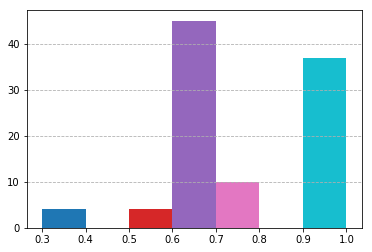

In [10]:
color_map = plt.cm.get_cmap('tab10')
#plt.title('Confidence of Labeling')
plt.grid(axis='y', linestyle='dashed')
ticks = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plt.xticks(ticks)
n, bins, patches = plt.hist(
    agg_data['label:confidence'], bins=ticks, color='green')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', color_map(c))
plt.show()

In [50]:
agg_data

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,assigned_class,assigned_class:confidence,assigned_class_gold,label,new_sentence,sentence,iteration,domain,a,b
0,1445637774,False,finalized,3,11/10/2017 13:41:19,NO_COMP,1.0000,NaN,NO_COMP,"<span style=""color: #9A14B2; font-weight: bold"">python:[OBJECT_A]</span>, and <span style=""color: #6CB219; font-weight: bold"">ruby:[OBJECT_B]</span>, too) undoubtedly influenced people's votes when it","OBJECT_A, and OBJECT_B, too) undoubtedly influenced people's votes when it",1,-,python,ruby
1,1445637775,False,finalized,4,11/10/2017 13:43:53,NO_COMP,1.0000,NaN,NO_COMP,"I'd go with <span style=""color: #9A14B2; font-weight: bold"">python:[OBJECT_A]</span> or <span style=""color: #6CB219; font-weight: bold"">ruby:[OBJECT_B]</span>.",I'd go with OBJECT_A or OBJECT_B.,1,-,python,ruby
2,1445637776,False,finalized,3,11/10/2017 13:45:29,NO_COMP,1.0000,NaN,NO_COMP,"This is potentially useful for <span style=""color: #9A14B2; font-weight: bold"">python:[OBJECT_A]</span>, PHP, JS and <span style=""color: #6CB219; font-weight: bold"">ruby:[OBJECT_B]</span>.","This is potentially useful for OBJECT_A, PHP, JS and OBJECT_B.",1,-,python,ruby
3,1445637777,False,finalized,3,11/10/2017 13:44:29,NO_COMP,0.6562,NaN,NO_COMP,"And your other server languages like <span style=""color: #9A14B2; font-weight: bold"">python:[OBJECT_A]</span>, PHP, <span style=""color: #6CB219; font-weight: bold"">ruby:[OBJECT_B]</span>, etc.","And your other server languages like OBJECT_A, PHP, OBJECT_B, etc.",1,-,python,ruby
4,1445637778,False,finalized,3,11/10/2017 13:42:11,NO_COMP,0.6916,NaN,NO_COMP,"Java learned a lot from <span style=""color: #9A14B2; font-weight: bold"">ruby:[OBJECT_A]</span>, <span style=""color: #6CB219; font-weight: bold"">python:[OBJECT_B]</span> and even C#.","Java learned a lot from OBJECT_A, OBJECT_B and even C#.",1,-,ruby,python
5,1445637779,False,finalized,3,11/10/2017 13:44:25,NO_COMP,1.0000,NaN,NO_COMP,"<span style=""color: #9A14B2; font-weight: bold"">python:[OBJECT_A]</span>/<span style=""color: #6CB219; font-weight: bold"">ruby:[OBJECT_B]</span>/Groovy/Perl is:",OBJECT_A/OBJECT_B/Groovy/Perl is:,1,-,python,ruby
6,1445637780,False,finalized,3,11/10/2017 13:42:48,NO_COMP,1.0000,NaN,NO_COMP,"Java, <span style=""color: #9A14B2; font-weight: bold"">ruby:[OBJECT_A]</span>, <span style=""color: #6CB219; font-weight: bold"">python:[OBJECT_B]</span>, Perl, also all work.","Java, OBJECT_A, OBJECT_B, Perl, also all work.",1,-,ruby,python
7,1445637781,False,finalized,3,11/10/2017 13:43:47,NO_COMP,1.0000,NaN,NO_COMP,"highlighting mzscheme, perl, <span style=""color: #9A14B2; font-weight: bold"">python:[OBJECT_A]</span>, and <span style=""color: #6CB219; font-weight: bold"">ruby:[OBJECT_B]</span> by default.","highlighting mzscheme, perl, OBJECT_A, and OBJECT_B by default.",1,-,python,ruby
8,1445637782,False,finalized,4,11/10/2017 13:46:52,NO_COMP,1.0000,NaN,NO_COMP,"Highly skilled in Perl, PHP, <span style=""color: #9A14B2; font-weight: bold"">python:[OBJECT_A]</span>, <span style=""color: #6CB219; font-weight: bold"">ruby:[OBJECT_B]</span> programming languages.","Highly skilled in Perl, PHP, OBJECT_A, OBJECT_B programming languages.",1,-,python,ruby
9,1445637783,False,finalized,3,11/10/2017 13:44:29,NO_COMP,1.0000,NaN,NO_COMP,"<span style=""color: #9A14B2; font-weight: bold"">python:[OBJECT_A]</span>, java, <span style=""color: #6CB219; font-weight: bold"">ruby:[OBJECT_B]</span>, php, javascript","OBJECT_A, java, OBJECT_B, php, javascript",1,-,python,ruby


#### Least confident sentences

In [11]:
color_map = sns.light_palette('blue', as_cmap=True)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.expand_frame_repr', True)
print('Least confident sentences (confidence <= 0.6)')
lc = agg_data[['_unit_id', 'label:confidence', 'label']]
lc = lc.sort_values('label:confidence')
lc = (lc[lc['label:confidence'] <= 0.6])
lc

Least confident sentences (confidence <= 0.6)


,_unit_id,label:confidence,label
25,1444891702,0.3473,UNCLEAR
67,1444891744,0.3478,NO_COMP
48,1444891725,0.3500,BETTER
66,1444891743,0.3879,NO_COMP
46,1444891723,0.5018,NO_COMP
47,1444891724,0.5085,NO_COMP
37,1444891714,0.5101,NO_COMP
31,1444891708,0.5121,NO_COMP


In [12]:
sentences = full_data[full_data['_unit_id'].isin(lc['_unit_id'].tolist())]
sentences_p = sentences[['_golden', '_unit_id','label', '_trust', 'sentence']]
#sentences_p.style.background_gradient(cmap=color_map,subset=['_trust'])

In [17]:
merged = pd.merge(lc, sentences_p, on=['_unit_id'], how='inner', suffixes=['_l', '_r'])
merged.rename(columns={'label_l' : 'winning_class', 'label_r':'proposed'}, inplace=True)

#subset = merged[['proposed', 'new_sentence']]

result = merged[['label:confidence', '_golden','winning_class', 'proposed', '_trust', 'sentence']]
result = result[result['_golden'] == False]

#result = pd.merge(result, subset, on='new_sentence')
#pd.merge(subset,subset, on='new_sentence', suffixes=['_a', '_b'], how='inner')
#result.groupby(by=['new_sentence', '_golden']).proposed.describe()
result.style.background_gradient(cmap=color_map,subset=['label:confidence'])

,label:confidence,_golden,winning_class,proposed,_trust,sentence
0,0.3473,False,UNCLEAR,UNCLEAR,0.875,"While OBJECT_A is slightly faster, OBJECT_B utilises memory better."
1,0.3473,False,UNCLEAR,UNCLEAR,0.9091,"While OBJECT_A is slightly faster, OBJECT_B utilises memory better."
2,0.3473,False,UNCLEAR,UNCLEAR,0.8333,"While OBJECT_A is slightly faster, OBJECT_B utilises memory better."
3,0.3478,False,NO_COMP,NO_COMP,1,"Sitting down with another programming language for a while can open your mind up to other ways of solving problems, and I think I became a better OBJECT_A programmer after spending time in OBJECT_B land."
4,0.3478,False,NO_COMP,NO_COMP,0.875,"Sitting down with another programming language for a while can open your mind up to other ways of solving problems, and I think I became a better OBJECT_A programmer after spending time in OBJECT_B land."
5,0.3478,False,NO_COMP,NO_COMP,1,"Sitting down with another programming language for a while can open your mind up to other ways of solving problems, and I think I became a better OBJECT_A programmer after spending time in OBJECT_B land."
6,0.35,False,BETTER,BETTER,1,"The only reason OBJECT_A is used over OBJECT_B, is because of libraries..."
7,0.35,False,BETTER,BETTER,1,"The only reason OBJECT_A is used over OBJECT_B, is because of libraries..."
8,0.35,False,BETTER,BETTER,0.8571,"The only reason OBJECT_A is used over OBJECT_B, is because of libraries..."
9,0.3879,False,NO_COMP,NO_COMP,0.8,"for json: i also think its better to just use OBJECT_A, OBJECT_B, perl and transform it."


### Labels

#### Distribution

In [29]:
columns = ['id','domain', 'sentence', 'it_1_confidence',  
           'better_count', 'worse_count','other_count','none_count', 'most_frequent_label', 'most_frequent_count', 
           'it_1_judgments',  'sentence_html']


def add_columns(agg,full):
    df = pd.DataFrame(columns=columns)
    for sid in full['sentence'].unique():
        better_count = 0
        better_trust = 0
        worse_count = 0
        worse_trust = 0
        none_count = 0
        none_trust = 0
        it_1_judgments = 0
        it_2_judgments = 0
        other_count =0
        other_trust = 0
        most_frequent = ''
        f_subset = full[full['sentence'] == sid]
        for i, f_row in f_subset.iterrows():
            label = f_row['please_select_how_object_a_and_object_b_compare_in_the_sentence_above']
            #_iteration = f_row['iteration']
            it_1_judgments +=1
            #if _iteration == 1:
             #   it_1_judgments +=1
            #else:
             #   it_2_judgments += 1
                
            if 'BETTER' == label:
                better_count +=1
                better_trust += f_row['_trust']
            elif 'WORSE' == label:
                worse_count += 1
                worse_trust += f_row['_trust']
            elif 'UNCLEAR' == label:
                other_count += 1
                other_trust += f_row['_trust']
            else:
                none_count +=1
                none_trust += f_row['_trust']
        winner = sorted([(other_trust,other_count,'UNCLEAR'),(better_trust, better_count, 'BETTER'), (worse_trust, worse_count, 'WORSE'),
                         (none_trust, none_count, 'NONE')],reverse=True)
        most_frequent_label = winner[0][2]
        most_frequent_count = winner[0][1]
        
        a_it1 = agg[(agg['sentence'] == sid)]
        
        

        if len(a_it1) == 1:
            content = [sid,a_it1.iloc[0]['domain'],a_it1.iloc[0]['sentence'],
                       a_it1.iloc[0]['label:confidence'],
                       better_count,worse_count,other_count,none_count,most_frequent_label,most_frequent_count,it_1_judgments,a_it1.iloc[0]['sentence']]
            df.loc[len(df)] =content
    
    df['judgments'] = df['it_1_judgments']
    
    
    df['most_frequent_percentage'] = df['most_frequent_count'] / df['judgments']
    numeric_cols =['it_1_confidence', 'most_frequent_count', 'most_frequent_percentage','judgments']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

    
    return df

In [30]:
combi = add_columns(agg_data,full_data)

In [31]:
from collections import defaultdict
d = defaultdict(int)
for v in combi['most_frequent_percentage']:
    if v == 1:
        d['100'] +=1
    elif v >= 0.8 and v <= 0.99:
        d['80-99'] += 1
    elif v >= 0.6 and v <= 0.79:
        d['60-79'] += 1
    else:
        d['0-50'] += 1

s = sum([v for k,v in d.items()])
print(s)
assert s == len(combi)
res = sorted([(k, v, '{:02.2f}\%'.format(( (v/s) *100 ))) for k,v in d.items()], key=lambda x: x[1],reverse=True)

for r in res:
    print('{}\%\t&\t{}\t&\t{}\t \\\ '.format(r[0], r[1],r[2]))

100
60-79\%	&	55	&	55.00\%	 \\ 
100\%	&	37	&	37.00\%	 \\ 
0-50\%	&	8	&	8.00\%	 \\ 


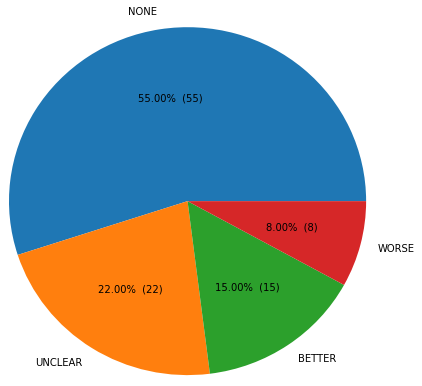

In [32]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


labels = combi['most_frequent_label']
plt.figure(figsize=plt.figaspect(1))
plt.pie(
    labels.value_counts().values,
    labels=labels.value_counts().keys().tolist(),
    radius=2,
    autopct=make_autopct(labels.value_counts().values))
plt.show()

In [41]:
combi[combi.most_frequent_percentage <= 0.5][['most_frequent_percentage','sentence', 'better_count','worse_count','other_count','none_count','most_frequent_label']]

,most_frequent_percentage,sentence,better_count,worse_count,other_count,none_count,most_frequent_label
25,0.333333,"While OBJECT_A is slightly faster, OBJECT_B utilises memory better.",1,1,1,0,WORSE
31,0.500000,Your C# and VB devs can suddenly easily write web apps and your OBJECT_A and OBJECT_B devs can too - with the added bonus of much better performance.,0,0,2,2,NONE
37,0.500000,Agile development is the most popular model at the moment because of architectures like OBJECT_A on Rails and Django (for OBJECT_B).,0,0,2,2,UNCLEAR
46,0.500000,"It is worth noting that because the APIs use the standard HTTP protocol you can easily work with them from any programming language including C#, Java, OBJECT_A, OBJECT_B, Perl, PHP and others.",0,0,2,2,UNCLEAR
47,0.500000,"With dynamically typed languages, like PHP, OBJECT_A, OBJECT_B, your development will be much faster, but you will have to test your code much better.",0,1,1,2,NONE
48,0.333333,"The only reason OBJECT_A is used over OBJECT_B, is because of libraries...",0,1,1,1,WORSE
66,0.333333,"for json: i also think its better to just use OBJECT_A, OBJECT_B, perl and transform it.",1,0,1,1,NONE
67,0.333333,"Sitting down with another programming language for a while can open your mind up to other ways of solving problems, and I think I became a better OBJECT_A programmer after spending time in OBJECT_B land.",1,0,1,1,NONE
